# Feature Selection, Model Selection and Tuning Project:

Objective is to predict concrete strength.

#### Importing libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("concrete.csv")
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### Exploratory Data Analysis:

In [3]:
df1.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [4]:
df1.shape

(1030, 9)

In [5]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
df1.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

<AxesSubplot:xlabel='cement', ylabel='Density'>

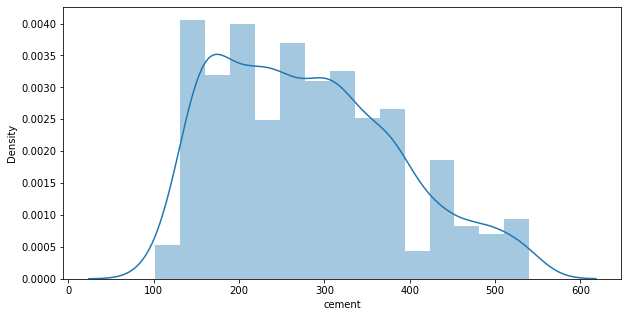

In [7]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['cement'])

<AxesSubplot:xlabel='slag', ylabel='Density'>

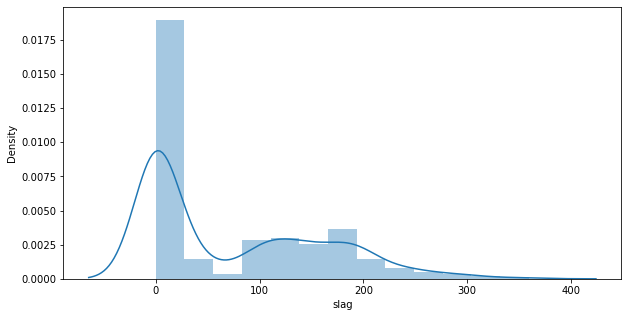

In [8]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['slag'])

<AxesSubplot:xlabel='ash', ylabel='Density'>

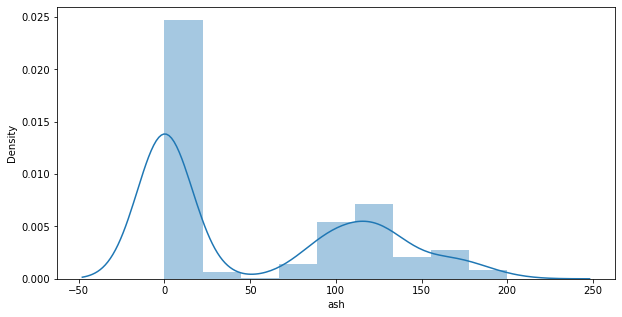

In [9]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['ash'])

<AxesSubplot:xlabel='water', ylabel='Density'>

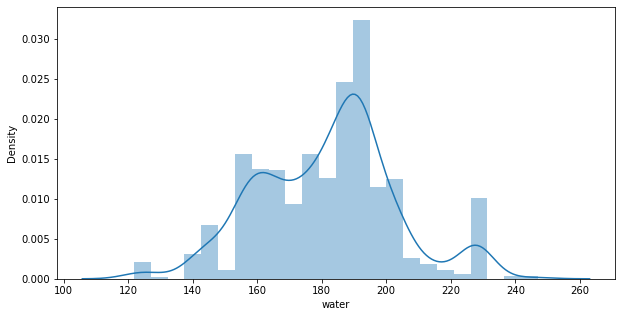

In [10]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['water'])

<AxesSubplot:xlabel='superplastic', ylabel='Density'>

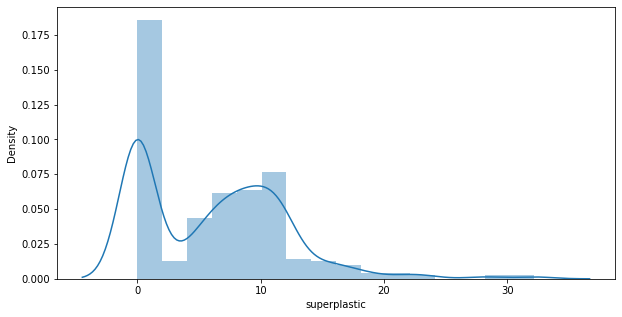

In [11]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['superplastic'])

<AxesSubplot:xlabel='coarseagg', ylabel='Density'>

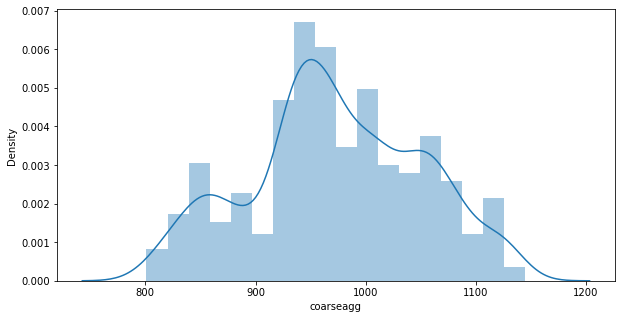

In [12]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['coarseagg'])

<AxesSubplot:xlabel='fineagg', ylabel='Density'>

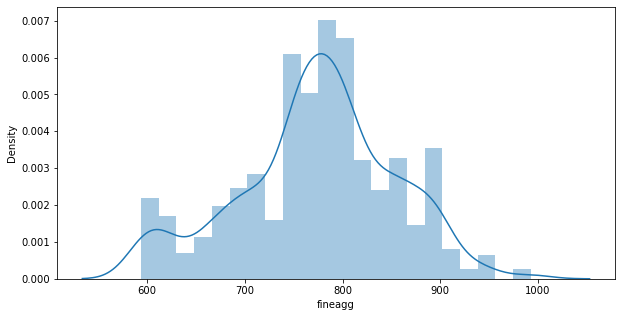

In [13]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['fineagg'])

<AxesSubplot:xlabel='age', ylabel='count'>

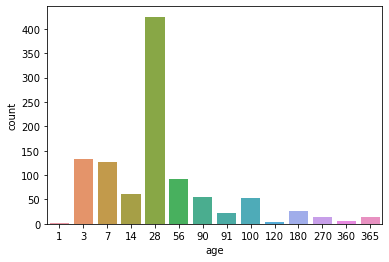

In [14]:
sns.countplot(df1['age'])

<AxesSubplot:xlabel='strength', ylabel='Density'>

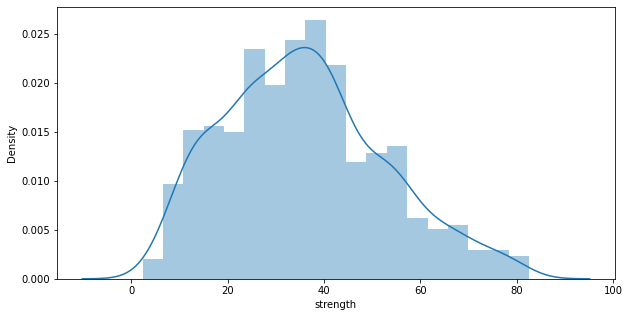

In [15]:
plt.figure(figsize = (10, 5))
sns.distplot(df1['strength'])

In [16]:
df1.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

#### Looking at the distplots and countplot, the attributes "cement", "slag", and "ash" are moderately skewed, the attributes "water", "superplastic", "coarseagg", "fineagg", and "strength" are almost symmetrical, and the attribute "age" is highly skewed to the right.

In [17]:
df1.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### There are no missing values. Taking a look at the dataset, it appears that the zero values aren't null values.

<AxesSubplot:xlabel='cement'>

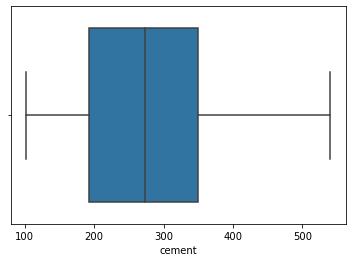

In [18]:
sns.boxplot(df1['cement'])

<AxesSubplot:xlabel='slag'>

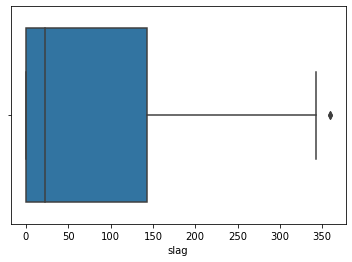

In [19]:
sns.boxplot(df1['slag'])

<AxesSubplot:xlabel='ash'>

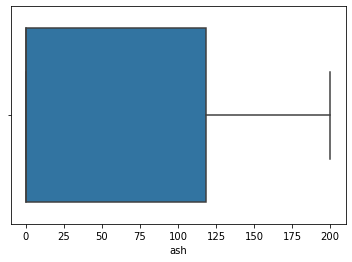

In [20]:
sns.boxplot(df1['ash'])

<AxesSubplot:xlabel='water'>

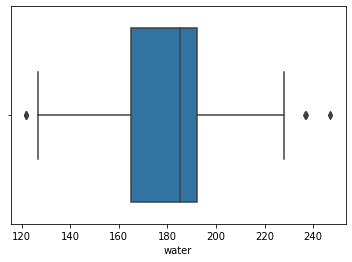

In [21]:
sns.boxplot(df1['water'])

<AxesSubplot:xlabel='superplastic'>

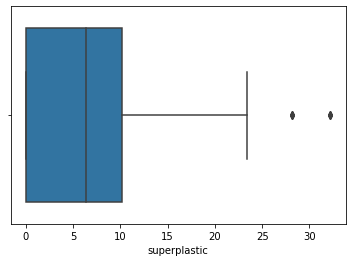

In [22]:
sns.boxplot(df1['superplastic'])

<AxesSubplot:xlabel='coarseagg'>

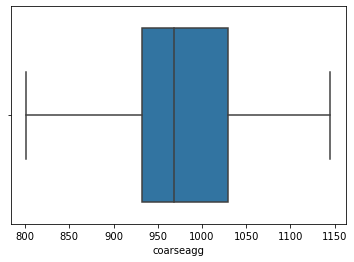

In [23]:
sns.boxplot(df1['coarseagg'])

<AxesSubplot:xlabel='fineagg'>

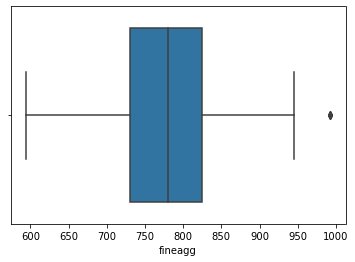

In [24]:
sns.boxplot(df1['fineagg'])

<AxesSubplot:xlabel='age'>

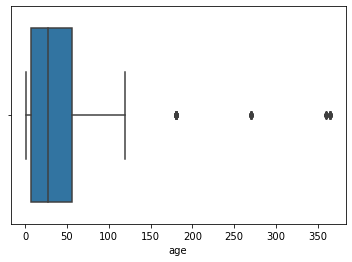

In [25]:
sns.boxplot(df1['age'])

<AxesSubplot:xlabel='strength'>

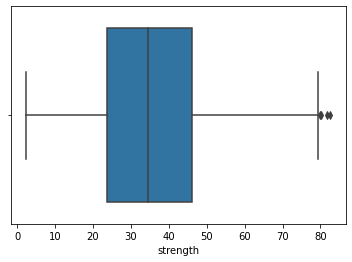

In [26]:
sns.boxplot(df1['strength'])

#### Looking at the boxplots, the attributes "slag", "water", "superplastic", "fineagg", "age", and "strength" all have outliers.

In [ ]:
Q1 = df1.quantile(0.25)             
Q3 = df1.quantile(0.75)

IQR = Q3 - Q1                           

lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

median = df1.median()

for column in ['slag','water','superplastic','fineagg','age','strength']:
    df1[column].replace(to_replace = df1[column].loc[((df1[column] < lower[column]) | (df1[column] > upper[column]))],value=median[column],inplace=True)

#### Bivariate analysis:

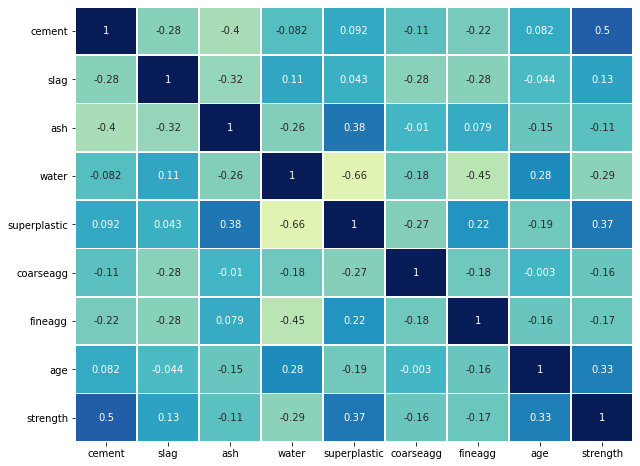

In [28]:
plt.figure(figsize=(10,8))

sns.heatmap(df1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

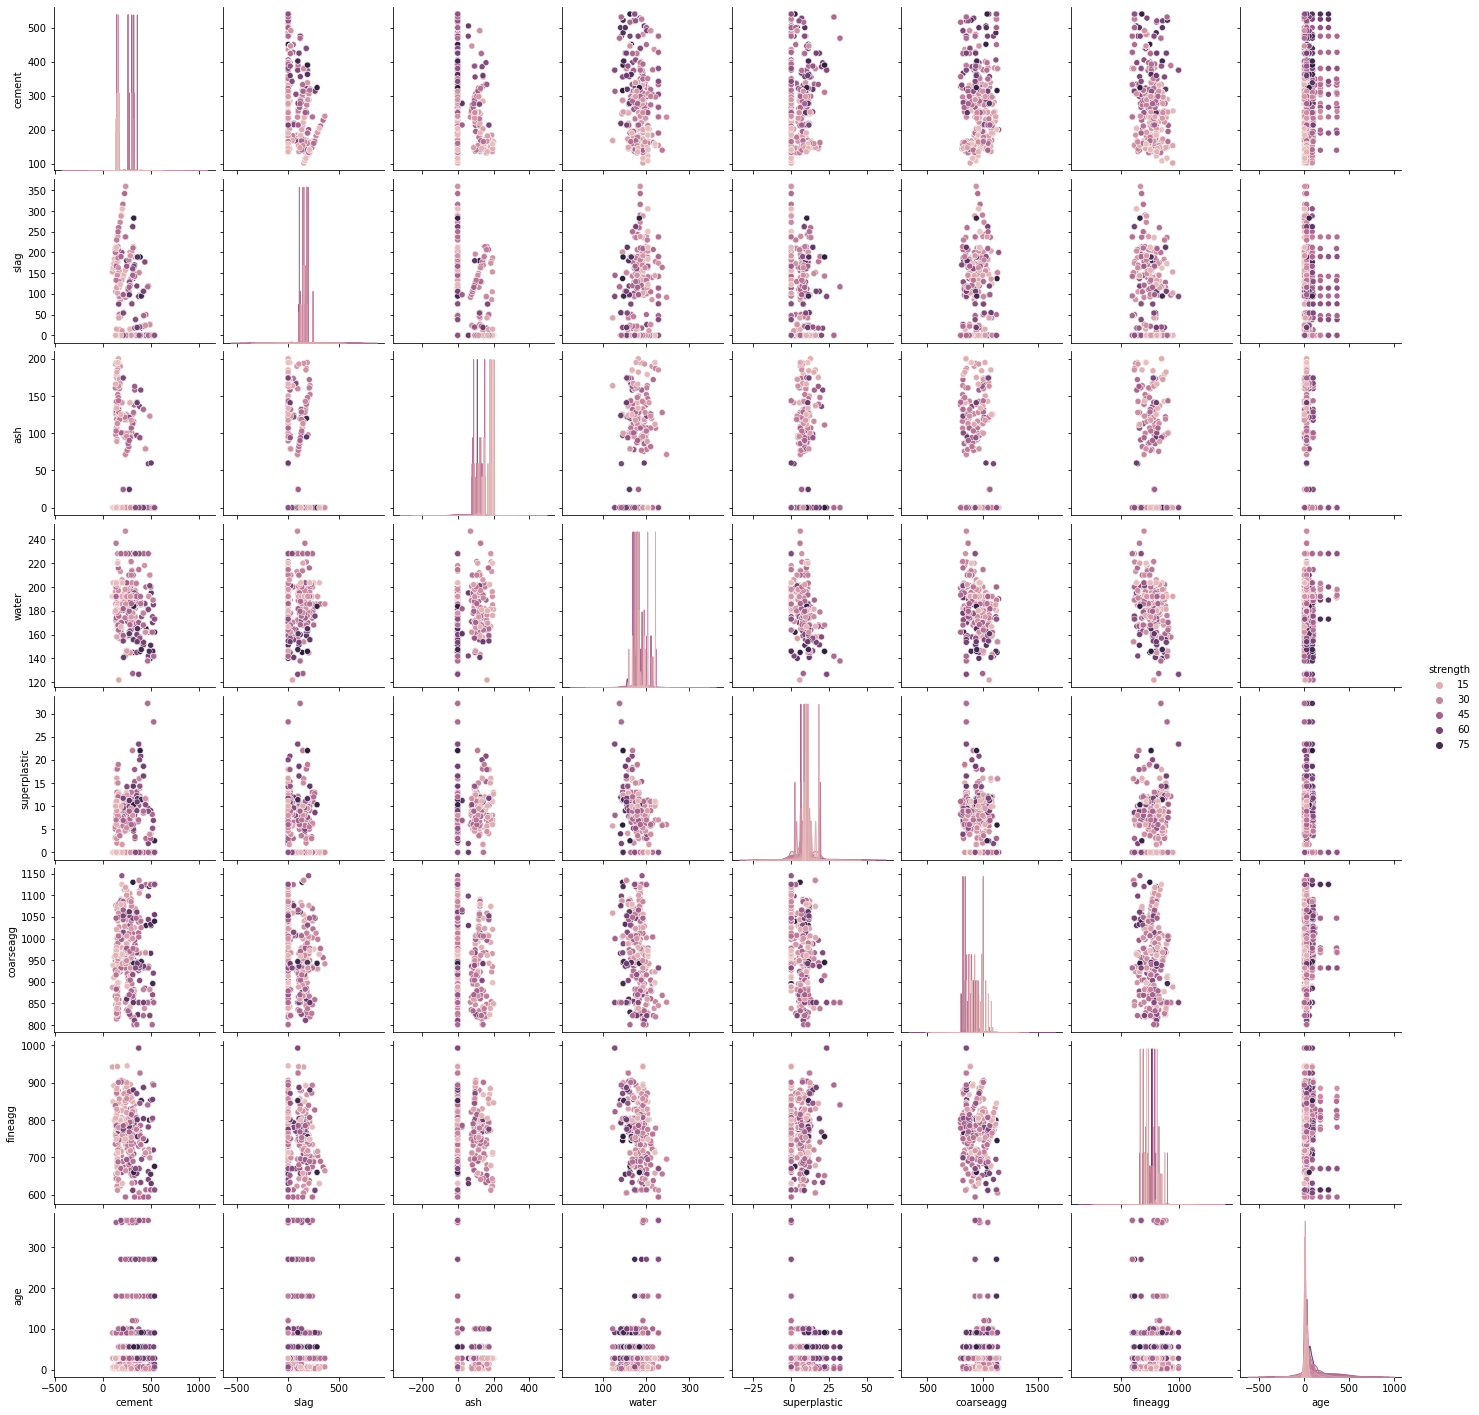

In [29]:
sns.pairplot(df1, hue = 'strength')

#### The amount of cement and superplasticizer, as well as age, have the highest correlations with the concrete compressive strength. However no attribute has a very strong correlation with strength.

#### Feature engineering techniques:

In [30]:
df1['water:cement'] = df1['water']/df1['cement']

In [31]:
df1['coarseagg:fineagg'] = df1['coarseagg']/df1['fineagg']

In [32]:
df1 = df1[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'water:cement', 'coarseagg:fineagg', 'strength']]

In [33]:
df1 = df1.drop(['cement','water','coarseagg:fineagg'],axis=1)

#### Train and test split:

In [34]:
X = df1.drop(columns= ['strength'])
y = df1.strength
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Deciding on complexity of model:

In [35]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

0.9948592423407845
0.8717542706628829


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=1))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

0.9948592423407845
0.8626793489923299


In [37]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=1))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

0.9948592423407845
0.8334342714547581


#### Model:

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression()
las = Lasso()
rid = Ridge()

lr.fit(X_train, y_train)
las.fit(X_train, y_train)
rid.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_las = las.predict(X_test)
y_pred_rid = rid.predict(X_test)

In [39]:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(lr, X, y, cv = 10).mean()
score1

0.54310380373267

In [40]:
score2 = cross_val_score(las, X, y, cv = 10).mean()
score2

0.4620829196353033

In [41]:
score3 = cross_val_score(rid, X, y, cv = 10).mean()
score3

0.5431259740936134

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

score4 = dt.score(X_test, y_test)
score4

0.8713992237873405

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

score5 = rf.score(X_test, y_test)
score5

0.9093941124800589

In [44]:
score6 = cross_val_score(dt, X, y, cv = 10).mean()
score6

0.8682889427060267

In [45]:
score7 = cross_val_score(rf, X, y, cv = 10).mean()
score7

0.9171085820182514

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   24.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   29.3s finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [47]:
rf1 = RandomForestRegressor(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)

score8 = cross_val_score(rf1, X, y, cv = 5).mean()

score8

0.9123521420804032

#### The random forest model peformed the best and had an accuracy of over 85%. The linear regression, lasso, and ridge models peformed the worst with the lowest accuracy scores through cross validation. However after grid search, the random forest model had a slightly lower cross validation score, although still above 85%.